# Single Model Training

This notebook is to enable model training for a single model using the specified parameters in config.yaml.


In [1]:
# Import required libraries
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "..", "..",))
sys.path.append(project_root)
from src.pipelines.xgboost.train_single_model import main

## 1. Run Model

In [2]:
# Now you can import from core if needed
from src.core.clients.bigquery import BigQueryClient
from src.core.config_loader import ConfigLoader

bq_client = BigQueryClient()
config_loader = ConfigLoader()

sales_query = f"""
    SELECT 
    *  
    FROM `porygon-pipelines.walmart_training_tables.walmart_master_table` tgt
    WHERE 
        tgt.ctx_store_id = 'CA_1'
        AND is_stockout_tgt = 0
        AND fea_item_longevity_months >=0
"""


# Extract data
df = bq_client.load_from_query(sales_query)


INFO:src.core.clients.bigquery:BigQuery client initialized for project: porygon-pipelines
/Users/anapreciado/Desktop/porygon-demand-forecasting/venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
INFO:src.core.clients.bigquery:Loaded 110992 rows from custom query.


In [3]:
df[["fea_item_longevity_months", "is_stockout_tgt"]].drop_duplicates()

,fea_item_longevity_months,is_stockout_tgt
0,0,0
950,9,0
951,35,0
953,34,0
955,16,0
...,...,...
17820,58,0
17821,50,0
17899,55,0
17965,54,0


In [4]:
features = [
    c for c in 
    df if "fea_" in c
]
trained_model = main(features = features)

INFO:src.pipelines.xgboost.train_single_model:
        XGBoost Model Training Pipeline is starting...
        
INFO:src.core.clients.bigquery:BigQuery client initialized for project: porygon-pipelines
/Users/anapreciado/Desktop/porygon-demand-forecasting/venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
INFO:src.core.clients.bigquery:Loaded 110992 rows from table: walmart_master_table
INFO:src.pipelines.xgboost.train_single_model:Filtering outliers ...
INFO:src.pipelines.xgboost.train_single_model:Training model...
INFO:src.core.models.xgboost:
            Training XGBoost Model...
            


[0]	validation_0-rmse:0.73538	validation_1-rmse:0.71358
[1]	validation_0-rmse:0.57409	validation_1-rmse:0.55764
[2]	validation_0-rmse:0.47331	validation_1-rmse:0.46134
[3]	validation_0-rmse:0.41311	validation_1-rmse:0.40499
[4]	validation_0-rmse:0.37854	validation_1-rmse:0.37303
[5]	validation_0-rmse:0.35902	validation_1-rmse:0.35560
[6]	validation_0-rmse:0.34753	validation_1-rmse:0.34597
[7]	validation_0-rmse:0.34051	validation_1-rmse:0.34109
[8]	validation_0-rmse:0.33587	validation_1-rmse:0.33926
[9]	validation_0-rmse:0.33293	validation_1-rmse:0.33801
[10]	validation_0-rmse:0.33047	validation_1-rmse:0.33786
[11]	validation_0-rmse:0.32861	validation_1-rmse:0.33787
[12]	validation_0-rmse:0.32679	validation_1-rmse:0.33803
[13]	validation_0-rmse:0.32550	validation_1-rmse:0.33799
[14]	validation_0-rmse:0.32410	validation_1-rmse:0.33906
[15]	validation_0-rmse:0.32295	validation_1-rmse:0.34001
[16]	validation_0-rmse:0.32186	validation_1-rmse:0.34014
[17]	validation_0-rmse:0.32026	validation

INFO:src.core.models.xgboost:Model saved to /Users/anapreciado/Desktop/porygon-demand-forecasting/src/artifacts/models/xgboost/20260125_163755/model_0.joblib
INFO:src.core.models.xgboost:
            Model Training Pipeline completed successfully!
            Run ID: /Users/anapreciado/Desktop/porygon-demand-forecasting/src/artifacts/models/xgboost/20260125_163755
            Artifacts saved to: /Users/anapreciado/Desktop/porygon-demand-forecasting/src/artifacts/models/xgboost/20260125_163755
            


## 2. Compare metrics with Benchmark

1. Compare Metrics (MdAPE, MdAE) with benchmark in total and accross validation sets of interest

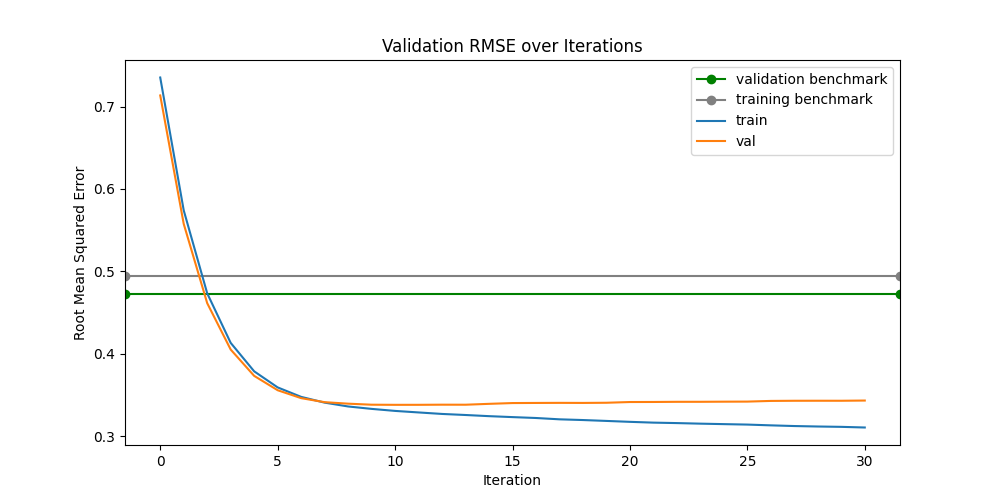

In [5]:
from IPython.display import Image, display
display(Image(trained_model.plot_bias_variance_tradeoff_path))

## 6. Evaluate Residuals

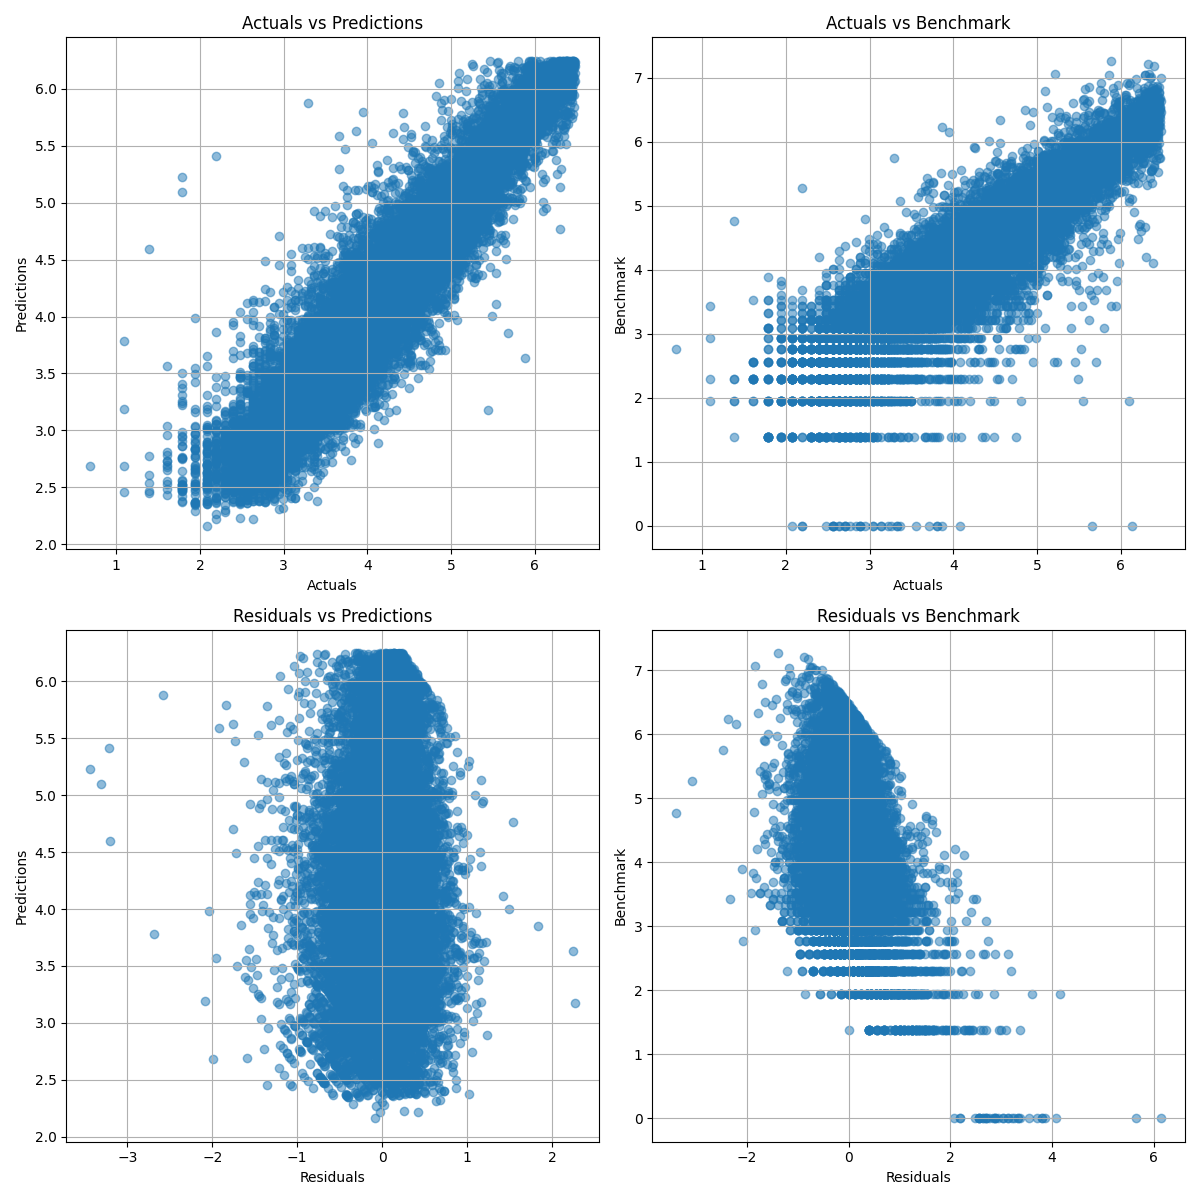

In [6]:
from IPython.display import Image, display
display(Image(trained_model.plot_residuals_paths))

## 8. Feature Importance

In [7]:
trained_model.feature_importance.head(20)

,feature,importance
115,fea_item_monthly_sales_roll_avg_12_months,78.0
62,fea_item_monthly_sales,71.0
8,fea_item_longevity_months,53.0
148,fea_item_monthly_sales_roll_coeffvar_12_months,52.0
57,fea_item_max_days_since_last_sale,41.0
20,fea_item_vs_dept_price_ratio_avg,41.0
144,fea_item_monthly_sales_ratio_lag_2_months,37.0
9,fea_item_store_price_avg,37.0
116,fea_item_monthly_sales_roll_std_12_months,37.0
95,fea_item_monthly_sales_lag_1_months,35.0


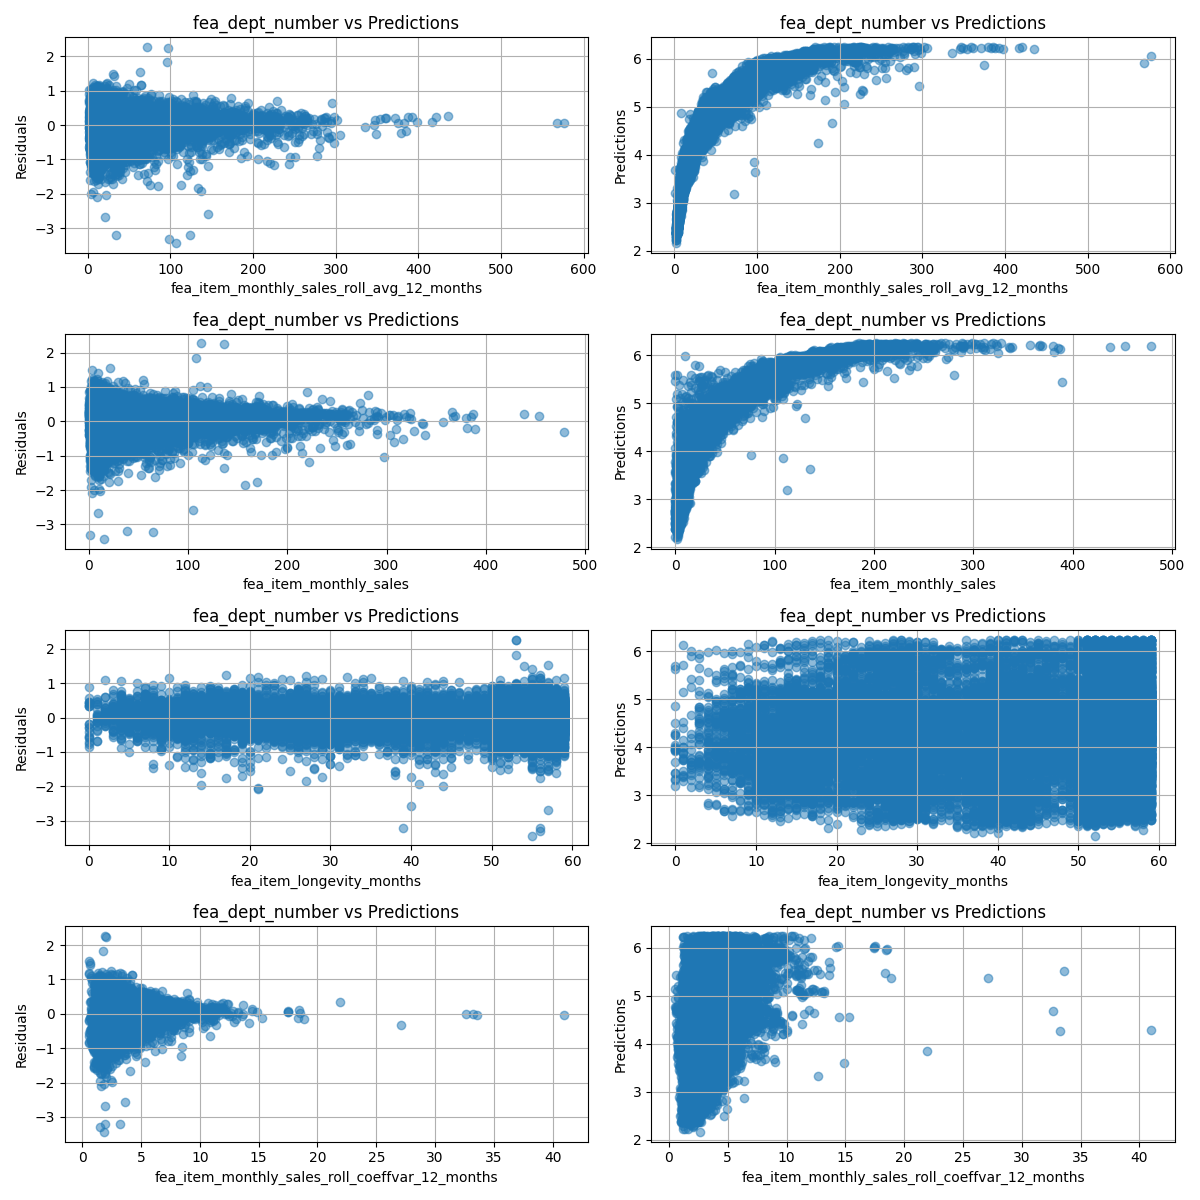

In [8]:
from IPython.display import Image, display
display(Image(trained_model._plot_importance_path))